<a href="https://colab.research.google.com/github/harkpun/Google-Play-Store-Analysis/blob/main/Play_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# mounting notebook on google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# reading both CSV Files From Drive and storing in dataframe
ps_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - EDA/Play Store Data.csv')
ur_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project - EDA/User Reviews.csv')

# **Exploring Dataset**

In [4]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
ps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
ps_df.shape

(10841, 13)

In [7]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
# droping current version and android version columns which are not much that important from play store dataframe.
ps_df.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)

In [9]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
dtypes: float64(1), object(10)
memory usage: 931.8+ KB


In [10]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
dtype: int64

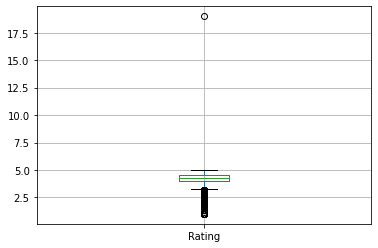

In [12]:
# checking for the oulier 
ps_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0d3550810>]],
      dtype=object)

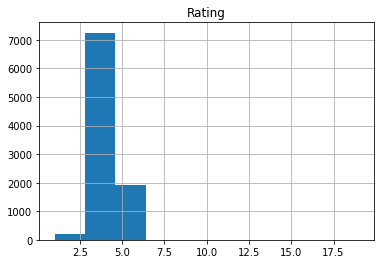

In [13]:
ps_df.hist()

In [14]:
# checking how many rating are more than 5 outlier
ps_df[ps_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


In [15]:
# deleting outlier row to getting proper insights from dataframe
ps_df.drop([10472], inplace=True)

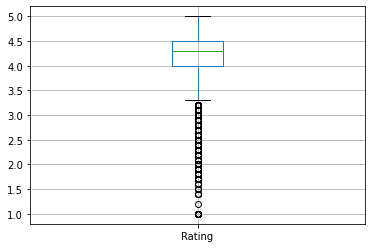

In [16]:
ps_df.boxplot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0d2fc8390>]],
      dtype=object)

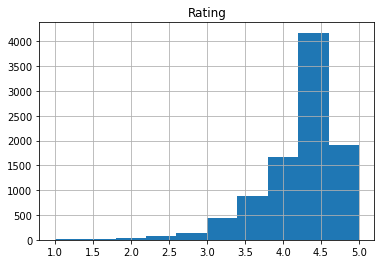

In [17]:
ps_df.hist()

# **Type Casting**

Converting
* Reviews
* Size
* Installs
* Price 

to numeric.

In [18]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1016.2+ KB


In [19]:
# converting Reviews column from object to numeric dtype  
ps_df['Reviews'] = ps_df['Reviews'].astype(int)

In [20]:
# converting Price column from object to numeric dtype
ps_df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [21]:
ps_df['Price'] = ps_df['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
ps_df['Price'] = round(ps_df['Price'].apply(lambda x : float(x)))

In [22]:
# converting Installs column from object to numeric dtype
ps_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [23]:
ps_df['Installs'] = ps_df['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
ps_df['Installs'] = ps_df['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
ps_df['Installs'] = ps_df['Installs'].apply(lambda x : int(x))

In [24]:
# converting Size column from oject to numeric dtype
ps_df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [25]:
#converting Kb into Mb
ps_df['Size'] = ps_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: float(x))

In [26]:
#Converting Last Updated column from string to Timestamp
ps_df['Last Updated'] = pd.to_datetime(ps_df['Last Updated'])

In [27]:
# new column
ps_df['Year-Month'] = ps_df['Last Updated'].dt.to_period('M')

In [28]:
# new column - Total Earning based on number of Installs 
ps_df['Total Earning'] = ps_df['Installs']*ps_df['Price']

In [29]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Year-Month,Total Earning
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,2018-01,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2018-01,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,2018-08,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,2018-06,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,2018-06,0.0


In [30]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Year-Month      10840 non-null  period[M]     
 12  Total Earning   10840 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5), period[M](1)
memory usage: 1.2+ MB


In [31]:
ps_df.describe()

,Rating,Reviews,Size,Installs,Price,Total Earning
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,1.084000e+04
mean,4.191757,4.441529e+05,21.516530,1.546434e+07,1.023616,3.575127e+04
std,0.515219,2.927761e+06,22.588748,8.502936e+07,15.949766,1.067125e+06
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000,0.000000e+00
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000,0.000000e+00
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000,0.000000e+00
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000,0.000000e+00
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,7.000000e+07


In [32]:
ps_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Year-Month           0
Total Earning        0
dtype: int64

# **Data Manipulation**

In [33]:
def impute_median(column):
  '''
  Imputing median value as NaN value for Numerical datatype.
  For 'Rating' and 'Size' column - Replacing NaN values with median of a DataFrame column.
  '''
  return column.fillna(column.median(), inplace=True)

In [34]:
# replacing NaN values with median value for Rating column
impute_median(ps_df['Size'])

In [35]:
# replacing NaN values with median value for Rating column
impute_median(ps_df['Rating'])

In [36]:
def impute_mode(column):
  '''
  Imputing mode value as NaN value for categorical datatype.
  For 'Type' column - Replacing NaN values with mode of a DataFrame column
  '''
  return column.fillna(str(column.mode()), inplace=True)

In [37]:
# replacing NaN values with mode value for Type column
impute_mode(ps_df['Type'])

In [38]:
ps_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Year-Month        0
Total Earning     0
dtype: int64

In [39]:
ps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Year-Month,Total Earning
3398,ZEDGE™ Ringtones & Wallpapers,PERSONALIZATION,4.6,6466641,13.0,100000000,Free,0.0,Teen,Personalization,2018-07-19,2018-07,0.0
4341,Dialer theme Droid L,PERSONALIZATION,4.3,1734,2.8,100000,Free,0.0,Mature 17+,Personalization,2016-04-02,2016-04,0.0
2335,DreamMapper,MEDICAL,4.2,10710,8.5,100000,Free,0.0,Everyone,Medical,2018-07-03,2018-07,0.0
1465,Trulia Rent Apartments & Homes,HOUSE_AND_HOME,4.4,71419,13.0,5000000,Free,0.0,Everyone,House & Home,2018-07-24,2018-07,0.0
3259,Nokia mobile support,TOOLS,4.4,12215,9.1,5000000,Free,0.0,Everyone,Tools,2018-08-01,2018-08,0.0


In [40]:
ps_df.describe()

,Rating,Reviews,Size,Installs,Price,Total Earning
count,10840.000000,1.084000e+04,10840.00000,1.084000e+04,10840.000000,1.084000e+04
mean,4.206476,4.441529e+05,20.18484,1.546434e+07,1.023616,3.575127e+04
std,0.480342,2.927761e+06,20.97683,8.502936e+07,15.949766,1.067125e+06
min,1.000000,0.000000e+00,0.00850,0.000000e+00,0.000000,0.000000e+00
25%,4.100000,3.800000e+01,5.90000,1.000000e+03,0.000000,0.000000e+00
50%,4.300000,2.094000e+03,13.00000,1.000000e+05,0.000000,0.000000e+00
75%,4.500000,5.477550e+04,26.00000,5.000000e+06,0.000000,0.000000e+00
max,5.000000,7.815831e+07,100.00000,1.000000e+09,400.000000,7.000000e+07


# **Data Cleaning**

In [41]:
ps_df.App.value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [42]:
ps_df.App.nunique()

9659

**From the above data we can infer that there are lots of duplicate values for the same app. To remove the duplicate values we will first sort the dataframe by 'Last Updated' date in descending order then we will remove the duplicates. In this way we will have the information for the latest entry in the database.**

In [43]:
# for example ROBLOX app, either should be from game category or from family catagoty.
ps_df[ps_df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Year-Month,Total Earning
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2018-07,0.0
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2018-07,0.0
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2018-07,0.0
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2018-07,0.0
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2018-07,0.0
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2018-07,0.0
2088,ROBLOX,FAMILY,4.5,4450855,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2018-07,0.0
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2018-07,0.0
4527,ROBLOX,FAMILY,4.5,4443407,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2018-07,0.0


In [44]:
# sorting the dataset in descending order of Last Updated date.
ps_df.sort_values(by = 'Last Updated', ascending = False, inplace = True)

In [45]:
# deleting the duplicate entries of App.
ps_df.drop_duplicates(subset = ['App'], inplace = True)

In [46]:
ps_df['App'].nunique()

9659

In [47]:
ps_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Year-Month,Total Earning
3280,HTC Sense Input-AR,TOOLS,3.8,1420,2.700,100000,Free,0.0,Everyone,Tools,2014-04-22,2014-04,0.0
621,Dating White Girls,DATING,4.3,0,3.600,50,Free,0.0,Mature 17+,Dating,2018-07-20,2018-07,0.0
4571,S Launcher Pro for Galaxy,PERSONALIZATION,4.1,47,0.026,1000,Paid,5.0,Everyone,Personalization,2016-02-12,2016-02,5000.0
4297,Kpop Music Quiz (K-pop Game),FAMILY,4.2,6418,59.000,100000,Free,0.0,Everyone,Casual,2017-05-08,2017-05,0.0
10509,PIP Selfie Camera Photo Editor,PHOTOGRAPHY,4.4,156322,13.000,10000000,Free,0.0,Everyone,Photography,2018-02-01,2018-02,0.0


In [48]:
ps_df.shape

(9659, 13)

**Checking the number of null values in *User_Review* dataframe.**

In [49]:
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [50]:
ur_df.shape

(64295, 5)

In [51]:
ur_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [52]:
# removing all the NaN value rows from user_review dataframe.
ur_df.dropna(inplace = True)

In [53]:
ur_df.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [54]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [55]:
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [56]:
ur_df.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
12968,Basketball Stars,Cool game lagging shots also players I play ge...,Positive,0.012500,0.512500
81,10 Best Foods for You,Great Great,Positive,0.800000,0.750000
1757,8fit Workouts & Meal Planner,Love shows exercises love usually less 10 minu...,Positive,0.351667,0.463333
12080,Badoo - Free Chat & Dating App,Like,Neutral,0.000000,0.000000
46466,Fishdom,A lot fun appropriately challenging. Lately sh...,Positive,0.328571,0.705556


In [57]:
ur_df.shape

(37427, 5)